In [1]:
import pandas as pd
import numpy as np
import math
from time import gmtime, strftime #DateTime Formatting
import matplotlib.pyplot as plt #Basic Plotting
import seaborn as sns #Advanced Plotting
import datetime
import warnings
import sklearn
import xgboost
import catboost
import shap

#pre-processing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

#sampling
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

#algorithms
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

#evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.3f}'.format

In [2]:
import os
orig_dir = os.getcwd()
os.chdir("C:\\Users\\gusahil\\Downloads")
os.getcwd()

'C:\\Users\\gusahil\\Downloads'

In [7]:
wine = pd.read_csv('wine_data_train.csv', sep=",").reset_index(drop = True).drop('ID', axis=1)
wine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5,R
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,5,R
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,5,R


In [12]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,5997.000,7.212,1.301,3.800,6.400,7.000,7.700,15.900
volatile acidity,5997.000,0.339,0.164,0.080,0.230,0.290,0.400,1.580
citric acid,5997.000,0.319,0.145,0.000,0.250,0.310,0.390,1.660
residual sugar,5997.000,5.445,4.757,0.600,1.800,3.000,8.100,65.800
chlorides,5997.000,0.056,0.034,0.009,0.038,0.047,0.064,0.610
free sulfur dioxide,5997.000,30.695,17.913,1.000,17.000,29.000,42.000,289.000
total sulfur dioxide,5997.000,116.313,56.619,6.000,78.000,119.000,156.000,440.000
density,5997.000,0.995,0.003,0.987,0.992,0.995,0.997,1.039
pH,5997.000,3.219,0.160,2.720,3.110,3.210,3.320,4.010
sulphates,5997.000,0.532,0.150,0.220,0.430,0.510,0.600,2.000


In [10]:
np.unique(wine['quality'], return_counts = True)

(array([-1,  3,  4,  5,  6,  7,  8,  9], dtype=int64),
 array([ 436,   26,  178, 1825, 2454,  916,  158,    4], dtype=int64))

In [11]:
np.unique(wine['color'], return_counts = True)

(array(['R', 'W'], dtype=object), array([1458, 4539], dtype=int64))

In [14]:
#wine.isnull()

In [15]:
# Feature PreProcessing

In [17]:
wine.loc[wine['quality'] == -1, 'quality'] = np.median(wine.loc[wine['quality'] != -1, 'quality'])

In [18]:
np.unique(wine['quality'], return_counts = True)

(array([3., 4., 5., 6., 7., 8., 9.]),
 array([  26,  178, 1825, 2890,  916,  158,    4], dtype=int64))

In [21]:
# use pd.concat to join the new columns with your original dataframe
wine = pd.concat([wine,pd.get_dummies(wine['color'], prefix='color')],axis=1).drop(['color','color_R'], axis=1)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_W
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5.000,0
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,5.000,0
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,5.000,0
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800,6.000,0
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5.000,0


In [23]:
# Create scalar
scaler = StandardScaler()

# Fit on training data
wine_normalize = scaler.fit_transform(wine)
wine_normalize_df = pd.DataFrame(wine_normalize, columns = wine.columns)
                            
wine_normalize_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_W
0,0.144,2.199,-2.193,-0.745,0.592,-1.100,-1.454,1.035,1.819,0.190,-0.910,-0.995,-1.764
1,0.452,3.295,-2.193,-0.598,1.236,-0.318,-0.871,0.703,-0.117,0.992,-0.576,-0.995,-1.764
2,0.452,2.565,-1.918,-0.661,1.060,-0.876,-1.101,0.769,0.257,0.792,-0.576,-0.995,-1.764
3,3.065,-0.359,1.659,-0.745,0.563,-0.765,-0.995,1.102,-0.367,0.324,-0.576,0.203,-1.764
4,0.144,2.199,-2.193,-0.745,0.592,-1.100,-1.454,1.035,1.819,0.190,-0.910,-0.995,-1.764


In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(wine_normalize_df)



In [27]:
np.unique(kmeans.labels_, return_counts=True)
#kmeans.cluster_centers_

(array([0, 1, 2, 3, 4]), array([1572,  882, 1513,  567, 1463], dtype=int64))

In [28]:
kmeans.cluster_centers_

array([[-2.12365378e-01, -3.82860071e-01,  1.85145569e-05,
        -3.43165071e-01, -1.98305146e-01, -1.55977855e-01,
         2.18141023e-01, -3.45851269e-01, -9.20564940e-02,
        -2.98818894e-01, -2.44048260e-01, -4.32977724e-01,
         5.62307678e-01],
       [ 1.26301966e-01,  1.67003687e+00, -1.21319547e+00,
        -6.33714276e-01,  7.28073009e-01, -7.93156267e-01,
        -1.18934934e+00,  5.32953899e-01,  9.88569665e-01,
         4.74683880e-01, -2.13600393e-01, -4.59961888e-01,
        -1.74587394e+00],
       [-4.43835014e-01, -3.88821859e-01,  4.25562715e-02,
        -3.92072979e-01, -5.69245624e-01,  5.09618999e-02,
        -2.37258214e-02, -1.16143157e+00, -4.60975437e-02,
        -2.75051035e-01,  1.14766456e+00,  8.93839357e-01,
         5.46742611e-01],
       [ 2.01609498e+00,  4.26959534e-01,  9.91087786e-01,
        -5.90955413e-01,  1.23390936e+00, -9.10575725e-01,
        -1.33492171e+00,  9.50530406e-01, -4.50467505e-02,
         1.44545797e+00,  1.23698281e

In [30]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

X = wine_normalize_df
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

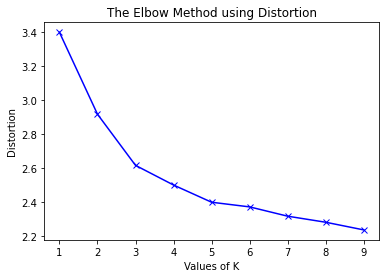

In [31]:
# It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [32]:

for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 3.398663442230733
2 : 2.917028762948958
3 : 2.6162602589705894
4 : 2.5006083589797243
5 : 2.3995061784912033
6 : 2.37215372581441
7 : 2.3174643113438664
8 : 2.2818834977325357
9 : 2.236834289199079


In [33]:
cluster_means = pd.DataFrame(kmeans.cluster_centers_, columns = wine.columns)
cluster_means

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_W
0,-0.212,-0.383,0.000,-0.343,-0.198,-0.156,0.218,-0.346,-0.092,-0.299,-0.244,-0.433,0.562
1,0.126,1.670,-1.213,-0.634,0.728,-0.793,-1.189,0.533,0.989,0.475,-0.214,-0.460,-1.746
2,-0.444,-0.389,0.043,-0.392,-0.569,0.051,-0.024,-1.161,-0.046,-0.275,1.148,0.894,0.547
3,2.016,0.427,0.991,-0.591,1.234,-0.911,-1.335,0.951,-0.045,1.445,0.124,0.140,-1.756
4,-0.173,-0.357,0.300,1.385,-0.116,0.946,1.025,0.883,-0.431,-0.242,-0.845,-0.238,0.564
